<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [2]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708,2372.20000,7024878.38000,22882.34000,0.79609,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685,2372.20000,631643.29000,2057.47000,0.71043,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
2,Castor seed,1997,Kharif,Assam,796.00000,22,2372.20000,75755.32000,246.76000,0.23833,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000,2372.20000,1870661.52000,6093.36000,5238.05174,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794,2372.20000,165500.63000,539.09000,0.42091,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000


In [3]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
19684,Small millets,1998,Kharif,Nagaland,4000.00000,2000,2225.40000,395200.00000,1160.00000,0.50000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19685,Wheat,1998,Rabi,Nagaland,1000.00000,3000,2225.40000,98800.00000,290.00000,3.00000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00000,440900,1295.90000,29586735.11000,96373.73000,1.28500,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00000,5488,1295.90000,26242746.82000,85481.26000,0.01667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00000,392160,1295.90000,22778368.48000,74196.64000,1.26182,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000


## **Exploratory Data Analysis**

In [4]:
# Basic info
print('Dataset has {} rows and {} columns.'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 19689 rows and 45 columns.


In [5]:
# Column names
yield_df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type', 'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp',
       'Feb_temp', 'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp',
       'Monsoon_temp', 'Nov_temp', 'Oct_temp', 'Post_Monsoon_temp', 'Sep_temp',
       'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain', 'MAR_rain',
       'APR_rain', 'MAY_rain', 'JUN_rain', 'JUL_rain', 'AUG_rain', 'SEP_rain',
       'OCT_rain', 'NOV_rain', 'DEC_rain', 'Jan-Feb_rain', 'Mar-May_rain',
       'Jun-Sep_rain', 'Oct-Dec_rain'],
      dtype='object')

In [6]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19689 entries, 0 to 19688
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               19689 non-null  object 
 1   Crop_Year          19689 non-null  int64  
 2   Season             19689 non-null  object 
 3   State              19689 non-null  object 
 4   Area               19689 non-null  float64
 5   Production         19689 non-null  int64  
 6   Annual_Rainfall    19689 non-null  float64
 7   Fertilizer         19689 non-null  float64
 8   Pesticide          19689 non-null  float64
 9   Yield              19689 non-null  float64
 10  Country            19689 non-null  object 
 11  Soil_type          19689 non-null  object 
 12  Annual_mean_temp   18661 non-null  float64
 13  Apr_temp           18661 non-null  float64
 14  Aug_temp           18661 non-null  float64
 15  Dec_temp           18661 non-null  float64
 16  Feb_temp           18661 no

In [7]:
# Summary Statistics
pd.options.display.float_format = '{:2f}'.format
yield_df.describe(include= ['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.000000,2009.127584,6.498099,1997.000000,2004.000000,2010.000000,2015.000000,2020.000000
Area,19689.000000,179926.570308,732828.675888,0.500000,1390.000000,9317.000000,75112.000000,50808100.000000
Production,19689.000000,16435941.273097,263056839.812567,0.000000,1393.000000,13804.000000,122718.000000,6326000000.000000
Annual_Rainfall,19689.000000,2116.546236,1436.688844,274.700000,1194.700000,1633.000000,2468.300000,7155.300000
Fertilizer,19689.000000,24103312.448806,94946004.482527,54.170000,188014.620000,1234957.440000,10003847.200000,4835406877.000000
Pesticide,19689.000000,48848.353392,213287.354860,0.090000,356.700000,2421.900000,20041.700000,15750511.000000
Yield,19689.000000,79.954009,878.306193,0.000000,0.600000,1.030000,2.388889,21105.000000
Annual_mean_temp,18661.000000,24.292053,4.657964,3.830000,23.600000,26.010000,26.790000,29.080000
Apr_temp,18661.000000,27.224814,5.662884,2.820000,24.920000,29.600000,30.770000,33.020000
Aug_temp,18661.000000,26.474456,3.382358,10.420000,25.460000,27.310000,28.560000,31.290000


In [8]:
yield_df.describe(include= 'object').T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432
Country,19689,1,India,19689
Soil_type,19689,7,alluvial,7437


Rice is the most frequenctly occurring crop <br>
6 unique seasons. Kharif the most common season

Missing value analysis

<Axes: >

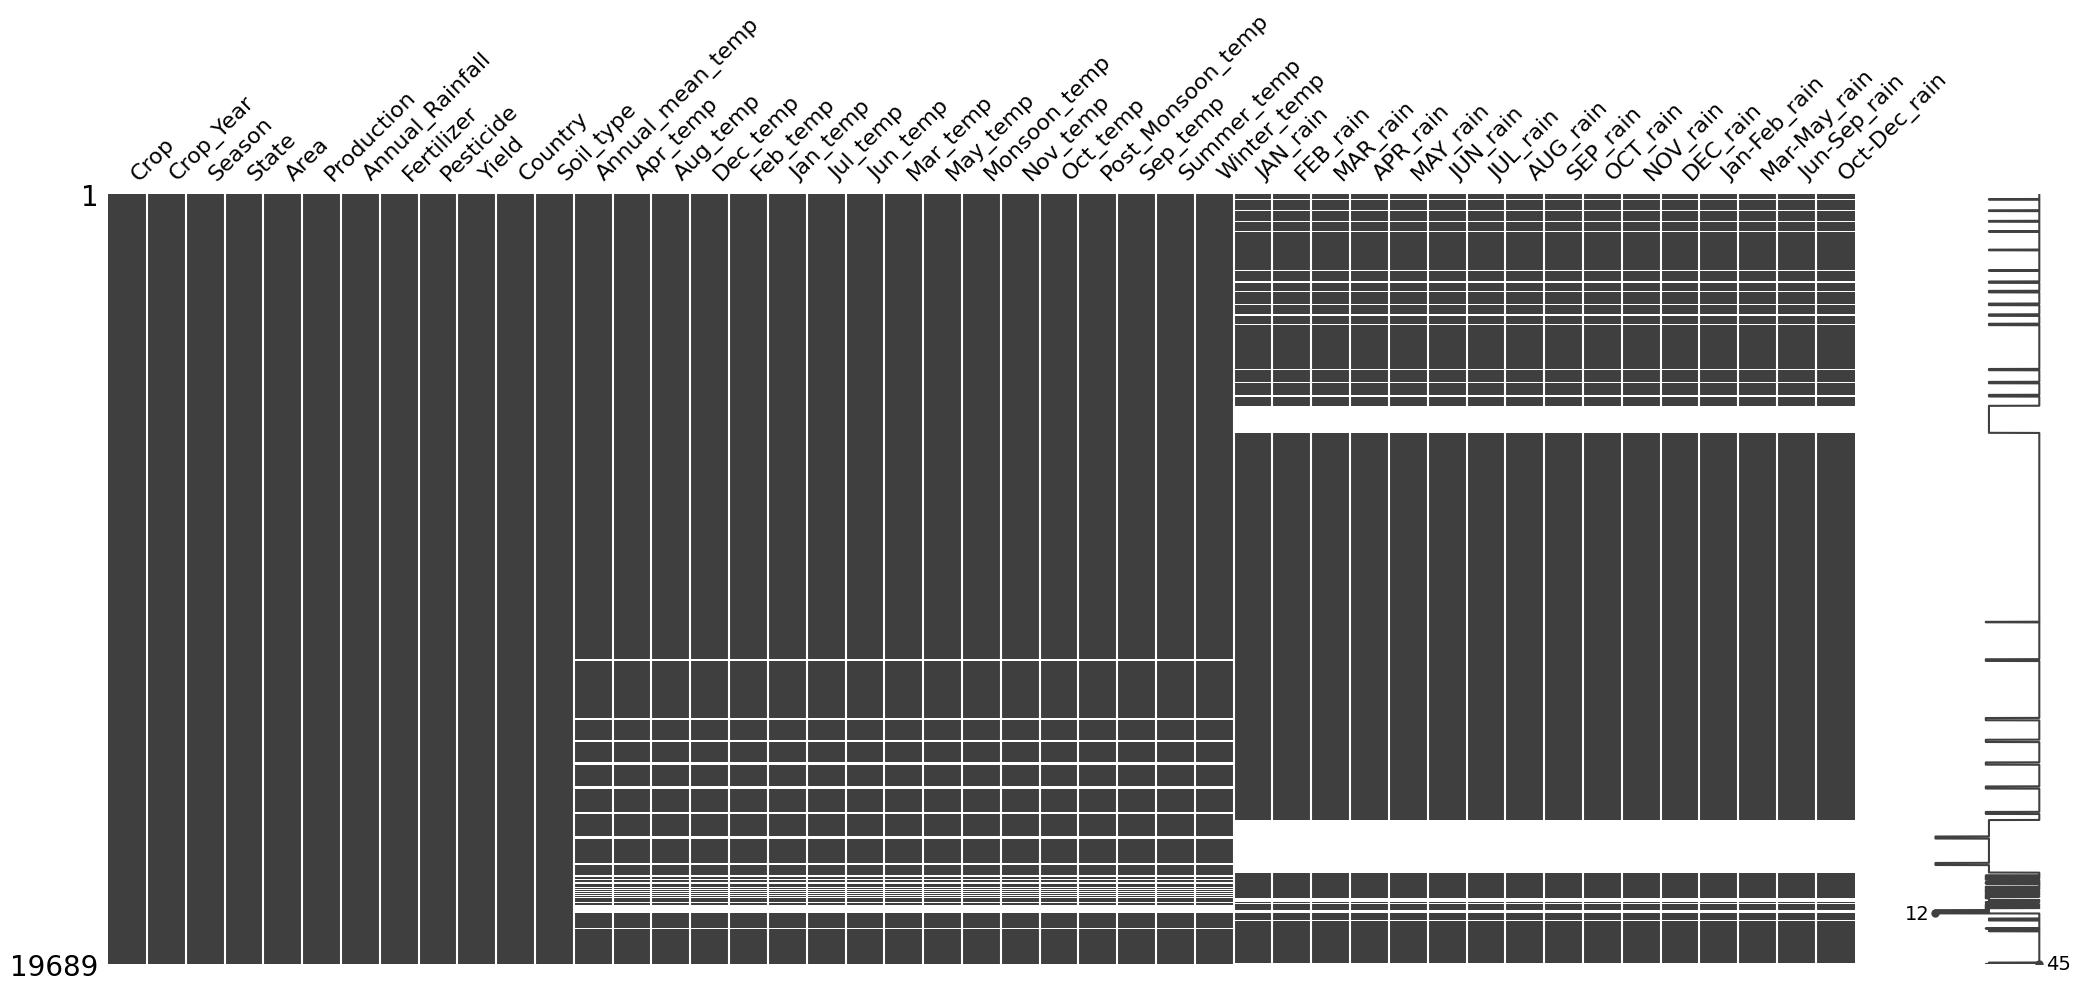

In [9]:
import missingno

missingno.matrix(yield_df)

In [10]:
# Calculate percentage of missing values per columns
missing_percent= (yield_df.isnull().sum() / len(yield_df)) * 100

# Combine with Counts
missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

                   Missing Values  Percentage (%)
APR_rain                     2766       14.048453
MAY_rain                     2766       14.048453
JUN_rain                     2766       14.048453
JUL_rain                     2766       14.048453
AUG_rain                     2766       14.048453
SEP_rain                     2766       14.048453
OCT_rain                     2766       14.048453
NOV_rain                     2766       14.048453
DEC_rain                     2766       14.048453
Jan-Feb_rain                 2766       14.048453
Mar-May_rain                 2766       14.048453
Jun-Sep_rain                 2766       14.048453
Oct-Dec_rain                 2766       14.048453
FEB_rain                     2766       14.048453
MAR_rain                     2766       14.048453
JAN_rain                     2766       14.048453
Winter_temp                  1028        5.221189
Oct_temp                     1028        5.221189
Summer_temp                  1028        5.221189


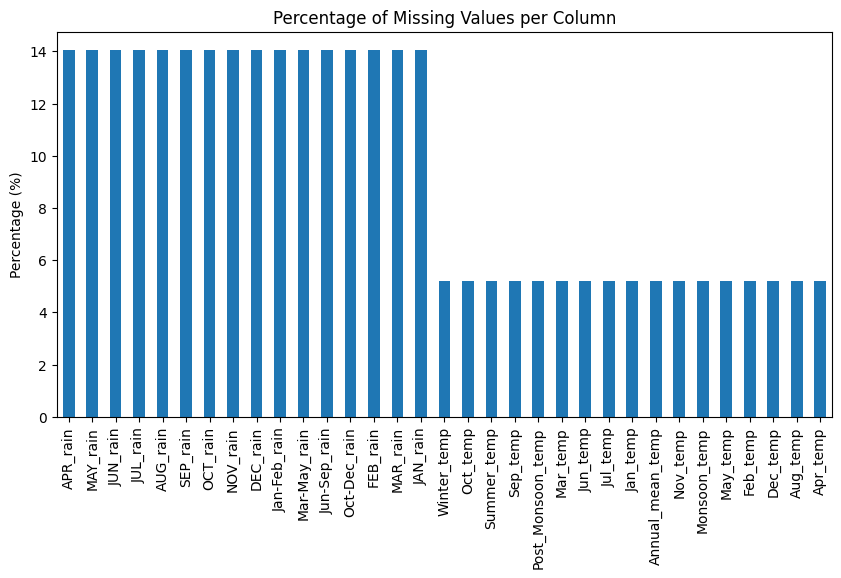

In [11]:
missing_data['Percentage (%)'].plot(kind='bar', figsize=(10,5))
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage (%)')
plt.show()

In [12]:
yield_df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [ ]:
yield_df.State.value_counts()

,count
State,
Karnataka,3956
Maharashtra,2852
Andhra Pradesh,2394
West Bengal,2094
Madhya Pradesh,1583
Uttar Pradesh,1568
Gujarat,1554
Chhattisgarh,915
Bihar,896


In [13]:
# 631+397
# Temperature detail of Telangana and JK missing from the dataset. Statistical imputation would make little sense

yield_df= yield_df.query("State not in ['Jammu and Kashmir', 'Telangana']")

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

              Missing Values  Percentage (%)
APR_rain                2580       14.048453
MAY_rain                2580       14.048453
JUN_rain                2580       14.048453
JUL_rain                2580       14.048453
AUG_rain                2580       14.048453
SEP_rain                2580       14.048453
OCT_rain                2580       14.048453
NOV_rain                2580       14.048453
DEC_rain                2580       14.048453
Jan-Feb_rain            2580       14.048453
Mar-May_rain            2580       14.048453
Jun-Sep_rain            2580       14.048453
Oct-Dec_rain            2580       14.048453
FEB_rain                2580       14.048453
MAR_rain                2580       14.048453
JAN_rain                2580       14.048453


In [14]:
# Analysing null values in Rain features

rain_cols = ['JAN_rain', 'FEB_rain', 'MAR_rain','APR_rain', 'MAY_rain', 'JUN_rain',
             'JUL_rain', 'AUG_rain', 'SEP_rain','OCT_rain', 'NOV_rain', 'DEC_rain',
             'Jan-Feb_rain', 'Mar-May_rain','Jun-Sep_rain', 'Oct-Dec_rain']


all_null_rain = yield_df[rain_cols].isnull().all(axis= 1).sum()
print('No of rows with no rainfall details available:', all_null_rain)

No of rows with no rainfall details available: 2580


In [ ]:
# yield_df.to_csv('working_file.csv')

In [15]:
null_by_year = (
            yield_df.groupby('Crop_Year')[rain_cols]
            .apply(lambda x: x.isnull().all().all())  # True if *all* rain cols null for the entire year
              )

# Filter years where condition is True
years_with_all_null_rain = null_by_year[null_by_year].index.tolist()

years_with_all_null_rain

[2018, 2019, 2020]

In [16]:
# Rainfall data for the year 2018, 2019 and 2020 are not available for any of the States. Since imputing for entire year values would be less sensible
# dropping rows have all rainfall details as NaN

yield_df= yield_df.dropna(subset= rain_cols, how= 'all')

missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [ ]:
# yield_df.to_csv('working_file.csv')

In [17]:
yield_df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
4028,Sesamum,2013,Whole Year,Kerala,265.000000,88,3255.400000,38289.850000,71.550000,0.255714,India,laterite,26.640000,29.230000,25.490000,25.750000,26.920000,26.120000,24.950000,25.660000,28.180000,28.310000,25.480000,26.550000,26.640000,26.310000,25.830000,28.570000,26.520000,3.900000,40.100000,49.900000,49.300000,119.300000,1042.700000,830.200000,369.700000,318.600000,259.900000,154.900000,17.000000,43.900000,218.500000,2561.200000,431.800000
6874,Sugarcane,1999,Whole Year,Maharashtra,590100.000000,53140400,5810.500000,62627313.000000,159327.000000,86.555769,India,black,26.650000,32.040000,26.220000,21.620000,25.150000,21.390000,26.940000,28.920000,28.610000,32.030000,27.090000,24.080000,26.460000,24.050000,26.280000,30.890000,23.270000,0.200000,33.600000,0.300000,0.100000,157.500000,1574.300000,1734.900000,796.600000,929.500000,582.700000,0.700000,0.000000,33.800000,157.900000,5035.100000,583.500000
18786,Barley,2013,Rabi,Sikkim,580.000000,592,2406.100000,83804.200000,156.600000,0.997500,India,mountain,4.770000,4.680000,11.030000,-1.700000,-2.190000,-3.660000,11.680000,11.570000,1.730000,8.210000,10.910000,0.930000,5.600000,1.610000,9.340000,4.870000,-2.930000,3.000000,23.600000,32.100000,114.700000,296.500000,404.900000,588.400000,416.300000,308.000000,199.800000,16.100000,2.700000,26.700000,443.400000,1717.600000,218.500000
8672,Soyabean,2003,Kharif,Nagaland,26000.000000,36000,2162.200000,2573480.000000,6240.000000,1.380000,India,red,19.290000,19.730000,24.050000,14.100000,14.300000,12.890000,23.180000,22.620000,16.680000,21.060000,23.350000,17.390000,21.920000,17.800000,23.530000,19.160000,13.600000,3.800000,11.500000,78.000000,158.900000,265.600000,590.900000,262.400000,281.700000,288.400000,175.100000,5.100000,40.900000,15.300000,502.400000,1423.400000,221.100000
1852,Potato,2005,Whole Year,Meghalaya,17986.000000,167030,2468.300000,2156881.120000,3777.060000,7.768571,India,alluvial,22.120000,23.200000,25.930000,17.020000,18.270000,15.740000,25.440000,25.410000,21.750000,23.200000,25.590000,20.230000,23.700000,20.320000,25.560000,22.720000,17.010000,22.800000,30.500000,172.200000,207.500000,281.200000,373.900000,474.500000,501.900000,174.900000,218.600000,8.900000,1.300000,53.300000,660.900000,1525.200000,228.900000


The rainfall data for years 2018, 2019, and 2020 were found to be completely missing across all rainfall-related features.
Since imputation was not meaningful without any reference values for these years, the corresponding rows were removed from the dataset to maintain data quality and ensure accurate model training.

In [18]:
# Checking for duplicate
yield_df.duplicated().sum()

np.int64(0)

In [ ]:
# There are no duplicate rows available in the dataset

### Data exploration

Final dataset has agricultural data for multiple crops cultivated across various Indian States from the year **1997 to 2020**

In [19]:
print('Dataset has {} rows and {} columns'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 16081 rows and 45 columns


In [20]:
# Unique values of categorical features

for col in yield_df.select_dtypes(include= 'object'):
  print()
  print(col+ ':')
  print(set(yield_df[col].tolist()))
  print()


Crop:
{'Khesari', 'Jowar', 'Sweet potato', 'Jute', 'Onion', 'Other Cereals', 'Castor seed', 'other oilseeds', 'Oilseeds total', 'Soyabean', 'Arecanut', 'Sunflower', 'Safflower', 'Turmeric', 'Banana', 'Potato', 'Small millets', 'Tobacco', 'Moth', 'Peas & beans (Pulses)', 'Arhar/Tur', 'Other  Rabi pulses', 'Rice', 'Tapioca', 'Guar seed', 'Maize', 'Sannhamp', 'Other Kharif pulses', 'Mesta', 'Groundnut', 'Garlic', 'Bajra', 'Barley', 'Ragi', 'Wheat', 'Cardamom', 'Cotton(lint)', 'Linseed', 'Niger seed', 'Sugarcane', 'Rapeseed &Mustard', 'Dry chillies', 'Ginger', 'Masoor', 'Urad', 'Gram', 'Horse-gram', 'Black pepper', 'Moong(Green Gram)', 'Other Summer Pulses', 'Sesamum', 'Coriander', 'Cashewnut', 'Cowpea(Lobia)', 'Coconut '}


Season:
{'Autumn     ', 'Summer     ', 'Winter     ', 'Whole Year ', 'Kharif     ', 'Rabi       '}


State:
{'Himachal Pradesh', 'Uttarakhand', 'Sikkim', 'Bihar', 'Madhya Pradesh', 'Tripura', 'Karnataka', 'West Bengal', 'Arunachal Pradesh', 'Odisha', 'Meghalaya', 'Pun

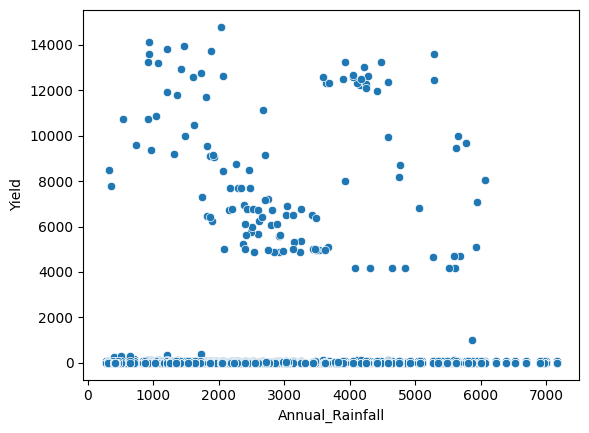

In [21]:
sns.scatterplot(x= yield_df.Annual_Rainfall, y= yield_df.Yield)
plt.show()

In [22]:
# Count detials for each crop year

yield_df.Crop_Year.value_counts(ascending = False)

,count
Crop_Year,
2017,929
2016,905
2015,866
2013,864
2014,849
2011,828
2012,815
2008,793
2009,788


The crop years range from 1997 to 2017, with 2017 having the highest number of records and 1997 the lowest.

In [23]:
# Count details for each crop. Top 10

yield_df.Crop.value_counts(ascending= False).head(10)

,count
Crop,
Rice,995
Maize,844
Moong(Green Gram),595
Groundnut,585
Urad,578
Sesamum,545
Potato,524
Sugarcane,512
Wheat,466


In [24]:
# Count details for each crop. Bottom 10

yield_df.Crop.value_counts(ascending= False).tail(10)

,count
Crop,
Other Cereals,95
Black pepper,95
Moth,89
Cowpea(Lobia),84
other oilseeds,77
Cardamom,68
Khesari,67
Guar seed,53
Oilseeds total,25


Note:-- Handling Low-Frequency Crops: Crops with low frequency, especially those with less than 30 records, could either be excluded or grouped into broader categories (e.g., "Other" crops).

In [25]:
# Count details for each Season

yield_df.Season.value_counts(ascending= False)

,count
Season,
Kharif,6595
Rabi,4546
Whole Year,3317
Summer,914
Autumn,366
Winter,343


Most Frequent Season: Kharif (6595 records) is the most prevalent season, followed by Rabi (4546 records) and Whole Year (3317 records). These are the dominant seasons for crop cultivation in the dataset.
Less Frequent Seasons: Summer, Autumn, and Winter seasons have much fewer records, with Winter having the least (343 records).

In [26]:
# Count details for each State

yield_df.State.value_counts(ascending= False)

,count
State,
Karnataka,1296
Andhra Pradesh,1128
West Bengal,1000
Chhattisgarh,821
Bihar,811
Madhya Pradesh,769
Uttar Pradesh,743
Gujarat,737
Tamil Nadu,710


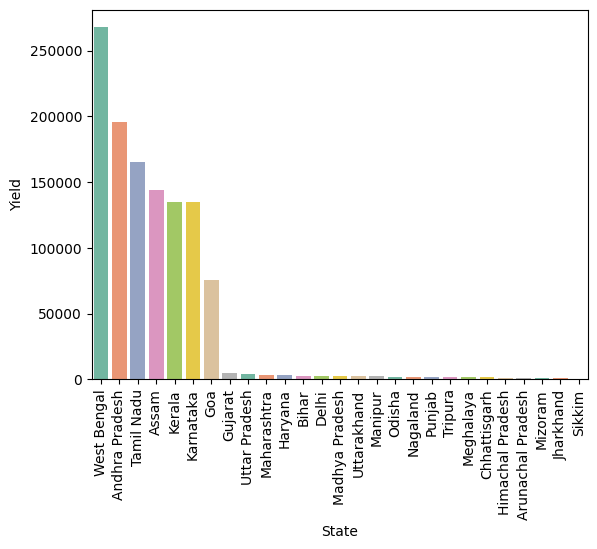

In [27]:
df_state= yield_df.groupby('State', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False)

sns.barplot(x= df_state.State, y= df_state.Yield, palette= 'Set2')
plt.xticks(rotation = 90)
plt.show()

West Bengal and Andhra Pradesh stands at the top with highest total crop yield

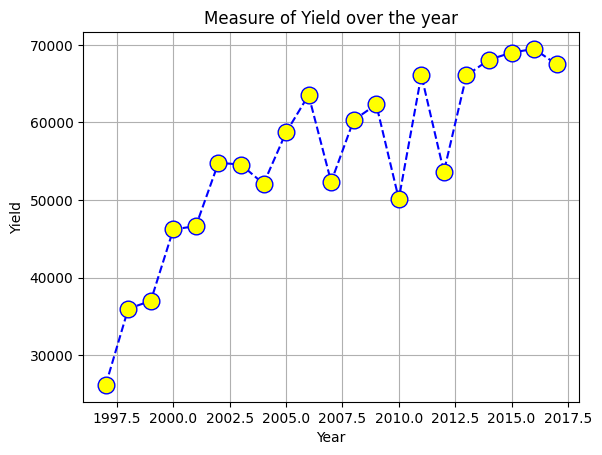

In [28]:
# Yield trend over the year

df_state= yield_df.groupby('Crop_Year', as_index= False)['Yield'].sum()

plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.grid()
plt.show()